Why and how many customers are leaving the furm. Eg customers leaving bank. Closing accounts in bank A and going to B.

eq. customers from airtel are moving to jio. Find out the parameter/feature that is causing this, and how many are those

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/Telco_Customer_Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 20)

for building machine learning models : first thing is data exploration

Results from data exploration

1. customerID is useless in terms of ml model

In [ ]:
df.drop('customerID',axis='columns',inplace = True)

In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

2. so many object kind of datatypes. even total changes are object

In [ ]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

vah kya data hai, numbers pr quotation lagakar diya hai

In [ ]:
df.MonthlyCharges.values # its okay, float 64

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [ ]:
pd.to_numeric(df.TotalCharges)

ValueError: ignored

there are some values which contains spaces in string, idk y??


In [ ]:
# let's see kon si rows hain, total charges me space hai
# pd.to_numeric(df.TotalCharges, errors='coerce') # jhan conversion not possible hoga vhan NaN dal dega esa krne se
pd.to_numeric(df.TotalCharges, errors='coerce').isnull().sum() # okay so total 11 hi rows me NaN ki problem aayegi out of 7043.


11

In [ ]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()] # will tell the rows jhan NaN ho jayega if string to numeric coerse ki help se krte hain tb

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


For all these rows total charges are blank , which means here null string

In [ ]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [ ]:
# out of 7043, dropping 11 does not create any issue

In [ ]:
df.iloc[488] # iloc = index location. , will show entire row or to access any pandar row by index

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [ ]:
df.iloc[488]['TotalCharges']

' '

In [ ]:
# dropping
df1 = df[df.TotalCharges!=' ']

In [ ]:
df1.shape

(7032, 20)

In [ ]:
df1[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape # 0 now, in df1; all ' ' have been removed

<ipython-input-19-5dcbaf82c177>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape


(0, 20)

In [ ]:
# now string number to numeric numbers
pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

Now no error = successfully all values can be converted to numeric

In [ ]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

<ipython-input-23-b67e0c3d31a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [ ]:
df1.TotalCharges.dtype # successfully converted to float

dtype('float64')

In [ ]:
df1.dtypes # here df.dtypes, upar df.dtype tha

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Quick Visualization

In [ ]:
# tenure = how loyel the customer is!


In [ ]:
# customers not leaving airtel
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [ ]:
df1[df1.Churn=='No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [ ]:
df1[df1.Churn=='No'].tenure.mean()

37.65000968429208

In [ ]:
df1[df1.Churn=='Yes'].tenure.mean()

17.979133226324237

In [ ]:
df1[df1.Churn=='No'].tenure.max()

72

In [ ]:
df1[df1.Churn=='Yes'].tenure.max()

72

In [ ]:
tenure_churn_no = df1[df1.Churn=='No'].tenure # tenure numpy series of persons which are not leaving( churn = No)
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

(array([[ 877.,  259.,  159.,  114.,  102.,   98.,   72.,   70.,   46.,
           72.],
        [ 847.,  476.,  402.,  424.,  371.,  346.,  380.,  425.,  455.,
         1037.]]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <a list of 2 BarContainer objects>)

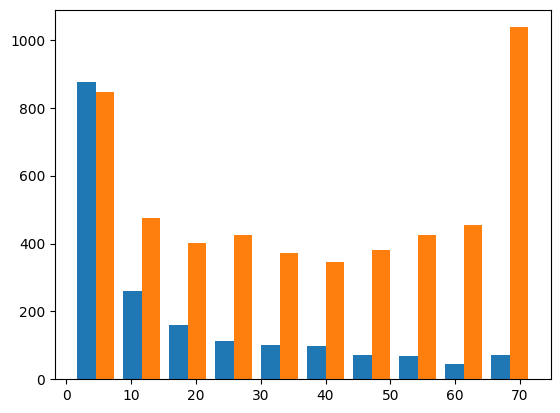

In [ ]:
plt.hist([tenure_churn_yes,tenure_churn_no]) # first  = first color , so blue is leaving(churn yes)

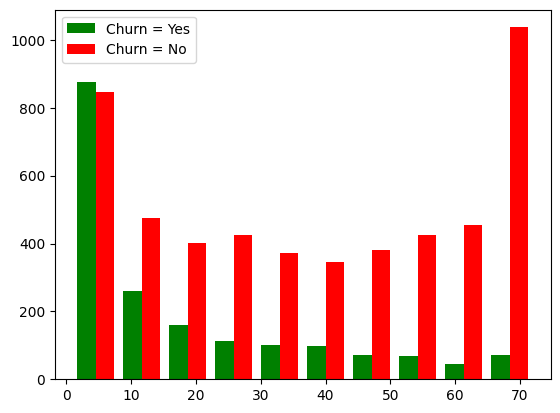

In [ ]:
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn = Yes','Churn = No']) # better visualization
plt.legend()

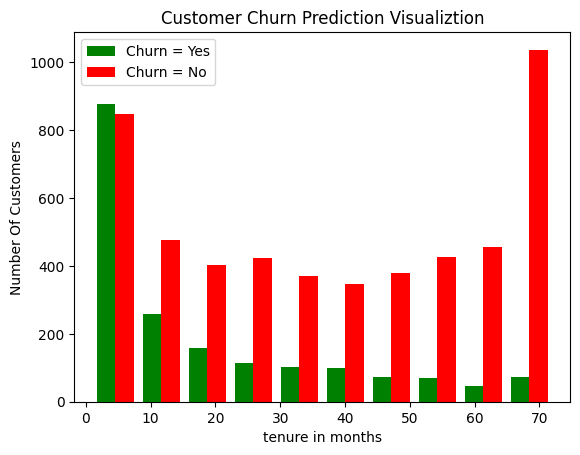

In [ ]:
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn = Yes','Churn = No']) # better visualization
plt.xlabel("tenure in months")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.legend()

Insights:

Higher tenure vale customers are not leaving

Less tenure vale customers are leaving more

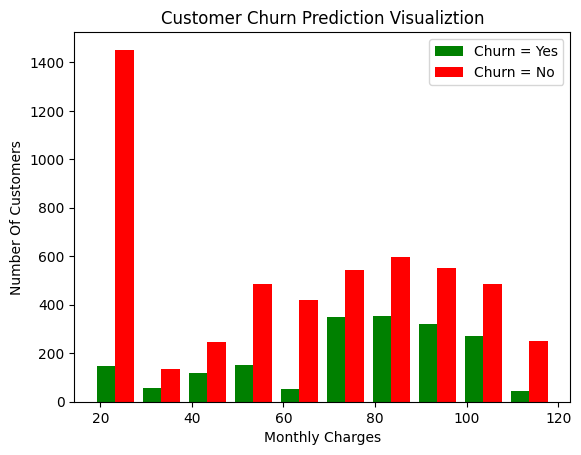

In [ ]:
from matplotlib.axes import mcoll
# monthly charges

MC_churn_no = df1[df1.Churn=='No'].MonthlyCharges
MC_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.hist([MC_churn_yes,MC_churn_no],color=['green','red'],label=['Churn = Yes','Churn = No']) # better visualization
plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.legend()

Monthly cahrges se kuch clear bata pana seems to be quite difficult. As in many cases, low_monthly_charges valon ke chhod ke jana , ek abmormal ghatna hai

Before label endoing : helper

In [ ]:
for column in df1:  # to to run for loop on every column
  print(column)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [ ]:
for col in df1: # same thingas above cell
  print(col)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [ ]:
for column in df1:
  print(df1[column].unique()) # it will print unique values in the each column

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
['No' 'Yes']


In [ ]:
for column in df1:
  print(f'{column} : {df1[column].unique()}') # it will print unique values in the each column

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [ ]:
# putting code in function : as we will use a lot, function for label encoding
def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes=='object':
      print(f'{column} : {df[column].unique()}')

In [ ]:
print_unique_col_values(df1) # by calling function, you will observe all unique values in categorical columns

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Assume :**No** And **No Internet/phone Service** are same

this is data cleaning phase

In [ ]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace = True)

<ipython-input-59-e2d02affc518>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
<ipython-input-59-e2d02affc518>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace = True)


In [ ]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Yes no -> 1, 0

In [ ]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                   'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling',
                  'Churn']

for col in yes_no_columns:
  df1[col].replace({'Yes':1,'No':0}, inplace=True)

<ipython-input-61-b3f1f10ab196>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1,'No':0}, inplace=True)


In [ ]:
print_unique_col_values(df1) # these are remaining object datatype columns

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
for column in df1:
  print(f'{column} : {df1[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


50 % data cleaning done

Don't need to do one hot encoding(..00100..) always . If you have two categories, just replace 0 and 1 it's okay.

In [ ]:
print_unique_col_values(df1) # these are remaining object datatype columns) # these are remaining object datatype columns with their corresponding unique values

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

<ipython-input-65-ba153b6b6960>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [ ]:
print_unique_col_values(df1)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
pd.get_dummies(data=df1,columns=['InternetService']) # for one column it will create three column in df data frame
# InternetService_DSL , 	InternetService_Fiber optic	, InternetService_No

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,1,0,1,0,0,0,1,0,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,0
1,0,0,0,0,34,1,0,1,0,1,...,0,One year,0,Mailed check,56.95,1889.50,0,1,0,0
2,0,0,0,0,2,1,0,1,1,0,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0
3,0,0,0,0,45,0,0,1,0,1,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,One year,1,Mailed check,84.80,1990.50,0,1,0,0
7039,1,0,1,1,72,1,1,0,1,1,...,1,One year,1,Credit card (automatic),103.20,7362.90,0,0,1,0
7040,1,0,1,1,11,0,0,1,0,0,...,0,Month-to-month,1,Electronic check,29.60,346.45,0,1,0,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,Month-to-month,1,Mailed check,74.40,306.60,1,0,1,0


So more than 2 categories  vale columns ko let's do one hot encoding

In [ ]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])

In [ ]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df2.shape # number of features or rows have been increased

(7032, 27)

In [ ]:
df2.sample(4) # 1 -> 3, 1-> 3, 1-> 4 ; ese columns are created, so in replacement of 3, 3+3+4 = 10 column are created = effectively new columns added = 10-3 = 7

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5561,0,0,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4053,0,1,0,0,11,1,1,1,1,0,...,1,0,0,1,0,0,1,0,0,0
6933,0,0,0,0,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2964,0,0,1,0,24,1,1,1,0,0,...,1,0,0,0,1,0,0,0,1,0


In [ ]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [ ]:
# all are now numbers : as required by ML model

In deep learning the scalling is very important

In [ ]:
print(df2.head())
# all are not visible anyhow, so just open the original file and check kin kin columns ki values 0 and 1 range  se bahar hai. Got just 3

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   
3              0               1             0                 1  ...   
4              0               0             0                 0  ...   

   InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                    1                            0        

In [ ]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
# min max scaler = 0 and 1 range me la deta hai = (x-x_min)/(x_max - x_min)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale]) # so this is the way to scale or normalize some specific columns only of the dataframe
# even for (1,0) columns; 1 = 1-0/1-0 = 1; 0-0/1-0 = 0; soo min-max normalization don't affect 1,0 columns. Pure dataframe pr bhi kr dene se koi dikkat na hoti


In [ ]:
df2.sample(6)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6620,0,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1667,0,0,0,0,0.183099,1,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1158,1,0,1,0,0.830986,1,1,1,1,0,...,0,1,0,1,0,0,0,1,0,0
6198,0,0,1,1,0.338028,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
6729,0,0,1,1,0.943662,1,0,0,0,1,...,1,0,0,0,0,1,1,0,0,0
575,0,0,1,0,0.845070,1,0,1,1,0,...,1,0,0,0,0,1,0,0,0,1


Separating Featurs and labels : final preprocessing stpes or thirst phase of preproceesing step

In [ ]:
X = df2.drop('Churn',axis='columns')
Y = df2['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

In [ ]:
print(x_train.shape, x_test.shape)

(5625, 26) (1407, 26)


In [ ]:
x_train[:10] # printing the first 10 rows

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [ ]:
len(x_train.columns)

26

Total 26 columns

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,),activation='relu'), # these are two layers,(input + 1 hidden) layer
    keras.layers.Dense(1,activation='sigmoid') # one output layer
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
176/176 [==============================] - 1s 2ms/step - loss: 0.5421 - accuracy: 0.7086
Epoch 2/5
176/176 [==============================] - 0s 2ms/step - loss: 0.4443 - accuracy: 0.7868
Epoch 3/5
176/176 [==============================] - 0s 2ms/step - loss: 0.4259 - accuracy: 0.7936
Epoch 4/5
176/176 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.7989
Epoch 5/5
176/176 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.7996


5 epochs pr run krke dekh liya, acuracy is 80 % that is good, so hyperparameters are ok. No need to change them. Now we can increase epochs keeping other hyperparameters same

In [ ]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4145 - accuracy: 0.8009
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4134 - accuracy: 0.8046
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4133 - accuracy: 0.8044
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8025
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4111 - accuracy: 0.8068
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8053
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8046
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8076
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8091
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4079 - accura

In the end : 82 % accuracy, kisi kisi epochs pr 90 % accuracy bhi dikhi thi, but again 81,80,82 pr aa gyi

In [ ]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4461 - accuracy: 0.7825


[0.44609931111335754, 0.7825160026550293]

0.44 binary_crossentropy error, and 0.78 % accuracy

In [ ]:
yp = model.predict(x_test)

44/44 [==============================] - 0s 3ms/step


In [ ]:
yp[:5]

array([[0.28389168],
       [0.64371645],
       [0.00783414],
       [0.7960592 ],
       [0.51223004]], dtype=float32)

oh, its 2D array

In [ ]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [ ]:
y_pred = []

for element in yp:
  if element > 0.5 :
    y_pred.append(1)
  else :
    y_pred.append(0)

In [ ]:
y_pred[:5]

[0, 1, 0, 1, 1]

In [ ]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

First 5 me se 3 correct and 2 wrong predictions = 60 % accurate

In [ ]:
print(y_test[:10])
print(y_pred[:10])

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64
[0, 1, 0, 1, 1, 1, 0, 0, 0, 0]


First 10 me 8 correct and only 2 wrong = 80% accurate.

vah , first 5 ke bad, second 5 all are correct predictions

# Confusion metrix on sklearn

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       999
           1       0.65      0.54      0.59       408

    accuracy                           0.78      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.77      0.78      0.78      1407



precision, recall, f1_score are for classes 0 and 1; while accuracy etc are for the whole

Text(95.72222222222221, 0.5, 'Truth')

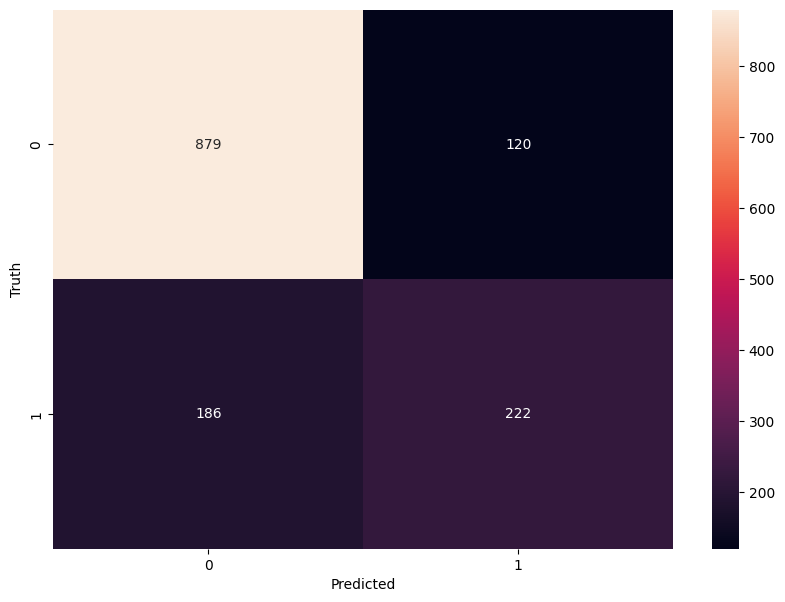

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# anything on the diagonal is correct
# non diagonal : errors

In [ ]:
acc = (879+222)/(879+120+186+222)
acc

0.7825159914712153

Accuracy

In [ ]:
round((862+229)/(862+229+137+179),2)

0.78

Precision for 0 class. i.e. Precision for customers who did not churn

In [ ]:
round(879/(879+186) , 2)

0.83

Precision for 1 class. i.e. Precision for customers who actually churned

In [ ]:
round(222/(222+120),2)

0.65

Recall for 0 class

In [ ]:
round(879/(879+120),2)

0.88

Recall for class 1

In [ ]:
round(222/(222+186),2)

0.54

# **Building a predictive system**

Here input dene se pahle hi sari data preprocessing(label and one hot encoding) kr leni hai. Mostly one hot encoding . Baki ko individually kr skte hain, but one hot encoding ke liye pura dataset required hota hai.

raw_data_df = pd.get_dummies(raw_data_df, columns=['InternetService', 'Contract'])
the above one hot encoding line won't work for single input, because ye autometically us column me uplabdh sari unique values ko fetch krke uske basis pr one hot encoding krta hai.
so one hot encoding ke all columns as an input upar do manuallly. Otherwise mamla bigad jayega

# Assuming all preprocessing (scalng, droping, encoding) have been done already on input list

In [145]:
raw_data=[0,	0	,0	,0	,1,	1,	0,	0,	0,	0,	1, 1 ,1, 1, 0.44, 0.88,	0,	0	,1,	1,	0,	0,	0,	0,	1	,0]

raw_data = np.asarray(raw_data)

# raw_data = np.reshape(raw_data, (1, -1))  # Reshape to 2D array
raw_data = raw_data.reshape(1,-1) # reshape 1D to 2D array . Both these lines are correct and achieve the same result

# Make predictions
predictions = model.predict(raw_data)

# Convert predictions to binary values
churn_prediction = 1 if predictions[0][0] > 0.5 else 0

print(churn_prediction)

1/1 [==============================] - 0s 59ms/step
0


 0 = Not leaving.

 1 = Leaving